<a href="https://colab.research.google.com/github/kgtantry/DeepLearning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [ ]:
#Fashion MINST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [ ]:
x_train.shape  # 60k images, 28*28 Grayscale images

(60000, 28, 28)

In [ ]:
y_train.shape # lables
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

6


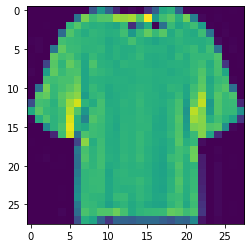

In [ ]:
num = 77
plt.imshow(x_train[num])
print(y_train[num])

In [ ]:
num_of_images = 5
category = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

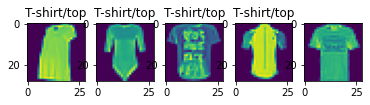

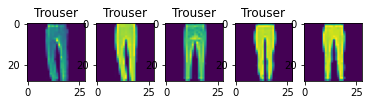

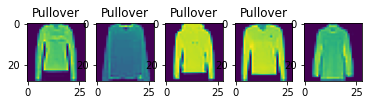

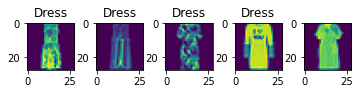

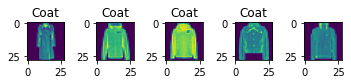

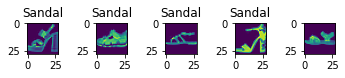

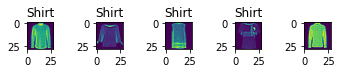

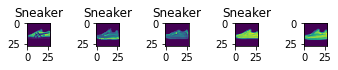

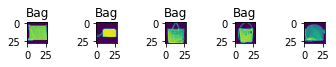

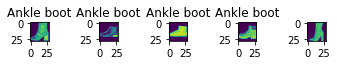

In [ ]:
for cat in range(10):
  #collect image index from y_train
  index = np.random.choice(np.where(y_train == cat)[0], 5)

  for col in range(5):
    plt.title(f"{category[cat]}")
    plt.subplot(cat +1, 5, col+1)
    plt.imshow(x_train[index[col]])
  plt.show()

In [ ]:
#Pre Processing(input {scaling})
x_train = x_train/255.0

In [ ]:
#Pre Processing(output) {Encoding}
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
from keras.api._v2.keras import activations
#del model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28,28), name="Input"))
model.add(tf.keras.layers.Flatten(name="Fatten"))
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu, name="HiddenLayer"))
model.add(tf.keras.layers.Dense(10,activation= tf.keras.activations.softmax, name = "Output"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Fatten (Flatten)            (None, 784)               0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               78500     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['acc'])

In [ ]:
model_history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size = 32)

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7660 - acc: 0.7516 - val_loss: 0.5706 - val_acc: 0.8055
Epoch 2/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5269 - acc: 0.8206 - val_loss: 0.5203 - val_acc: 0.8217
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4807 - acc: 0.8354 - val_loss: 0.4672 - val_acc: 0.8385
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4547 - acc: 0.8437 - val_loss: 0.4434 - val_acc: 0.8397
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4355 - acc: 0.8510 - val_loss: 0.4439 - val_acc: 0.8430
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4216 - acc: 0.8558 - val_loss: 0.4262 - val_acc: 0.8468
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4104 - acc: 0.8591 - val_loss: 0.4479 - val_acc: 0.8383
Epoch 8/20
1688/1688 [==============================] - 5s 3ms

In [ ]:
# number of Pixels in Fashion MNIST data
# One image 28 * 28
60000 * 28 * 28 #47M

47040000

In [ ]:
# Lets say if client shares images of shape 512x2048x3
512*2048*3 #3.1M for 1 image


3145728

In [ ]:
# Total Images - 60K
# Training - 54K 
# Val - 6K

# Each batch with have 32 images, batch_size = 32

In [ ]:
54_000 / 32
# 1688 batches are required for 54K images

1687.5

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

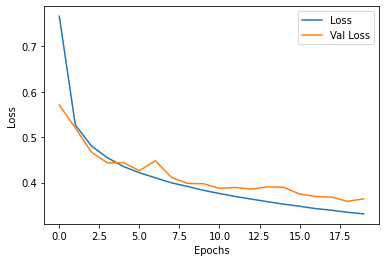

In [ ]:
plt.plot(model_history.history['loss'],label ='Loss')
plt.plot(model_history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

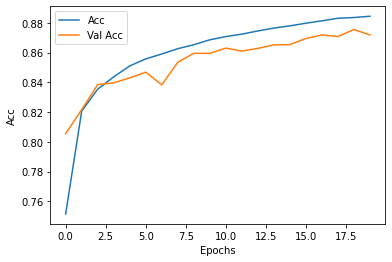

In [ ]:
plt.plot(model_history.history['acc'],label='Acc')
plt.plot(model_history.history['val_acc'], label ='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

In [ ]:
model.input_shape

(None, 28, 28)

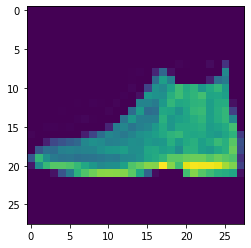

In [ ]:
#Num of Images, Height, Width
sample_image = x_test[0]
plt.imshow(sample_image)

In [ ]:
sample_image.shape

(28, 28)

In [ ]:
#Will my model accpet this image of size (28*28) -- NO 
model.input_shape

(None, 28, 28)

In [ ]:
# We need to append a 1 in shape
sample_image = np.expand_dims(sample_image,0)

In [ ]:
sample_image = sample_image/255.0
sample_image.shape

(1, 28, 28)

In [ ]:
results = model.predict(sample_image)
results

1/1 [==============================] - 0s 67ms/step


array([[1.41349055e-05, 2.27824131e-07, 1.51825425e-05, 5.44894056e-06,
        2.43523959e-06, 1.15988106e-01, 4.18510754e-05, 7.06807002e-02,
        2.21447833e-03, 8.11037481e-01]], dtype=float32)

In [ ]:
np.round(results,2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.07, 0.  , 0.81]],
      dtype=float32)

In [ ]:
#find the index, where prob is maximum!!
np.argmax(results)

9